In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/home/brad/DailyLog/20180213/


In [2]:
# Set up birds and block_paths
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*windt                 # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'ForBettiCurves2'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# Betti Parameters
analysis_id = 'BC'                # Generic lable
nperms = None                     # No permutation for each trial
ncellsperm = 33                   # Subsample 33 neurons from the population
dims = [0, 1, 2, 3]               # We want first four betti numbers
thresh = 13.0                     # Activation threshold
twin = np.linspace(0, 6000, 1000) # milliseconds

# Loop through each bird in our list and bin the data
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=cluster_group, dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

Data Not already binned
/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174044Z-10.0-5.0.binned
Data Not already binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174054Z-10.0-5.0.binned
Data Not already binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174108Z-10.0-5.0.binned
Data Not already binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174118Z-10.0-5.0.binned


In [5]:
# Choose which bird we want to plot and pull paths to data and binned data
bird = 'B1083'
bdf = bdfs[bird]
block_path = bps[bird]

In [6]:
reload(tp2)

# Compute the betti curves for the original data
(bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dims, twin, windt, dtovr, shuffle=False)

# Compute the betti curves for shuffled-in-time data
# This breaks the inter-neuronal coordination
(bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dims, twin, windt, dtovr, shuffle=True)

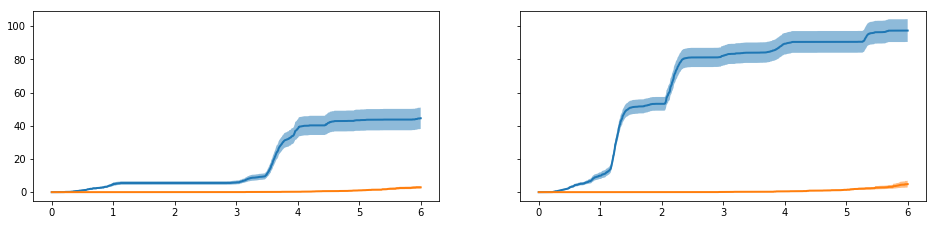

In [7]:
# Plot real against shuffled for two stimuli
# This serves as a useful template for betti curve plottinggg

# Generate figure and axes
fig, axs = plt.subplots(1,2, figsize=(16, 3.5), sharey=True)
axs = axs.flatten()

betti = 2                          # Betti number to plot
stims = np.array(list(bc.keys()))  # Stimuli names
stimIDs = [2, 3]                   # ID numbers of stimuli to plot
stims_to_plot = stims[stimIDs]     # names of stimuli to plot

# Compute the mean and stderr
bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc)     # Real curves 
bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bcs)   # Shuffled curves 

# Plot the curves
for ind, stim in enumerate(stims_to_plot):
    ax = axs[ind]
    tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
    tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)

# Save the figure
plt.savefig(os.path.join(figsavepth, '{}_P03S03_BettiCurveWithShuffled_betti{}_{}_only2stims.eps'.format(bird,betti, thresh)))

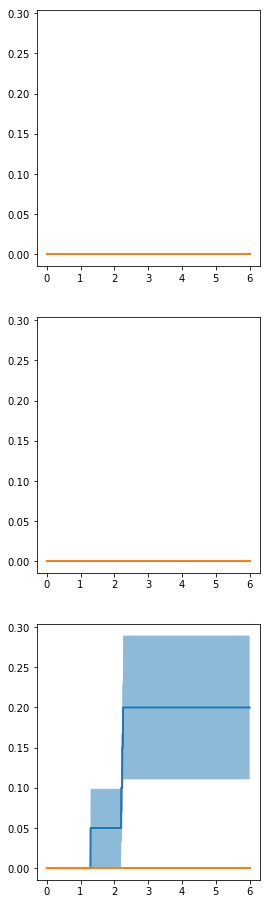

In [8]:

# Plot real against shuffled for two stimuli
# This serves as a useful template for betti curve plottinggg

# Generate figure and axes
fig, axs = plt.subplots(3,1, figsize=(4,16), sharey=True)
axs = axs.flatten()

betti = 3                          # Betti number to plot
stims = np.array(list(bc.keys()))  # Stimuli names
stimIDs = [1, 2, 3]                # ID numbers of stimuli to plot
stims_to_plot = stims[stimIDs]     # names of stimuli to plot

# Compute the mean and stderr
bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc)     # Real curves 
bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bcs)   # Shuffled curves 

# Plot the curves
for ind, stim in enumerate(stims_to_plot):
    ax = axs[ind]
    tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
    tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)

# Save the figure
plt.savefig(os.path.join(figsavepth, '{}_P03S03_BettiCurveWithShuffled_betti{}_{}.eps'.format(bird,betti, thresh)))

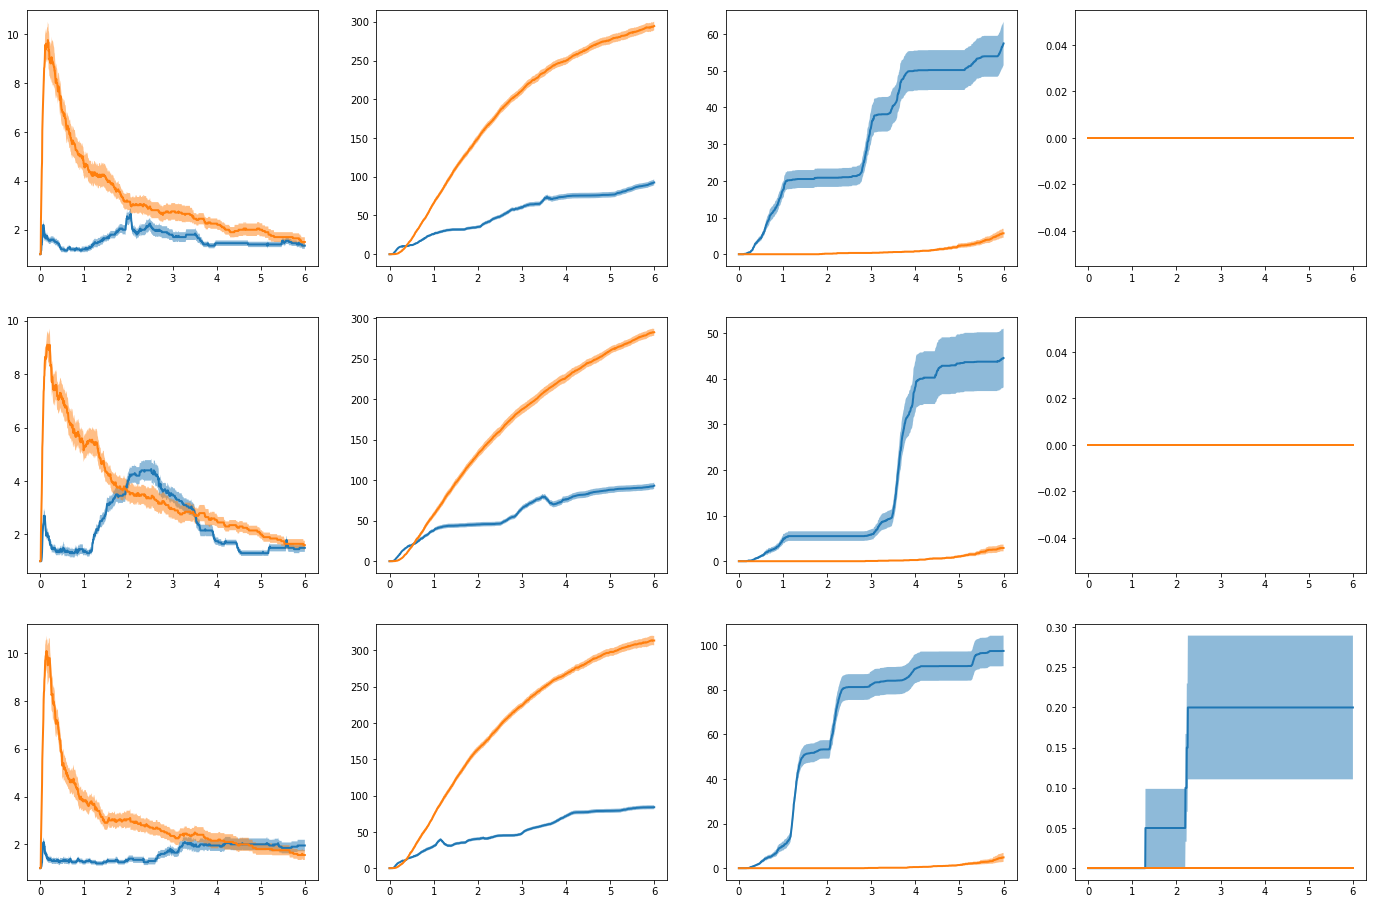

In [9]:
# generate figure and axes
fig, axs = plt.subplots(3,4, figsize=(24, 16), sharey=False)
axs = axs.flatten()

bettis = [0, 1, 2, 3]              # Betti number to plot
stims = np.array(list(bc.keys()))  # Stimuli names
stimIDs = [1, 2, 3]                # ID numbers of stimuli to plot
stims_to_plot = stims[stimIDs]     # names of stimuli to plot

# Compute the mean and stderr
bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bc)     # Real curves 
bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bcs)   # Shuffled curves 

for betti in bettis:
    for ind, stim in enumerate(stims_to_plot):
        ax = axs[4*ind + betti]
        tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
        tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)
    
plt.savefig(os.path.join(figsavepth, '{}_P03S03_BettiCurveWithShuffled_betti{}_{}_alltogether.eps'.format(bird,betti, thresh)))

In [ ]:
betti=4
plt.figure(figsize=(22, 11))
for stim in bc.keys():
    dat = bc[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    plt.plot(t_ms/1000., y, linewidth=2.5)
    
    ax = plt.gca()
    ax.fill_between(t_ms/1000., y-s, y+s, alpha = 0.3)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170814/', '{}_P03S03_BettiCurvesAllStim_betti{}.eps'.format(bird, betti)))

In [ ]:
fig, axs = plt.subplots(2, 4, sharey=True, figsize=(22, 11))
bettis = [0,1,2,3]

axs = np.ravel(axs)
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bcs[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    ax = axs[ind]
    for betti in bettis:
        y = avg[betti, :]
        ys = avgs[betti, :]
    
        s = stderr[betti, :]
        ss = stderrs[betti, :]
        ax.plot(t_ms/1000., y, linewidth=2.5)
        ax.fill_between(t_ms/1000., y-s, y+s, alpha = 0.3)
        ax.tick_params(labelsize=20)
        ax.set_xticks(range(7))
    #plt.plot(np.array([[x, x] for x in range(6)]).T, np.array([[0, np.amax(avg[betti, :])] for x in range(6)]).T, 'k--')

In [ ]:

betti = 0
fig, axs = plt.subplots(4,8, figsize=(44,22), sharey=False)
axs = axs.flatten()
for betti in range(4):
    #print(betti)
    for ind, stim in enumerate(bc.keys()):
        print(stim)
        dat = bc[stim]
        dats = bcs[stim]
        avg = np.mean(dat, axis=2)
        avgs = np.mean(dats, axis=2)
    
        std = np.std(dat, axis=2)
        stds = np.std(dats, axis=2)
    
        stderr = std / np.sqrt(np.shape(dat)[2])
        stderrs = stds / np.sqrt(np.shape(dats)[2])
    
        y = avg[betti, :]
        ys = avgs[betti, :]
    
        s = stderr[betti, :]
        ss = stderrs[betti, :]

        ax = axs[8*betti + ind]

        ax.plot(t_ms/1000, y,linewidth=2)
        ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
        ax.plot(t_ms/1000, ys, linewidth=2)
        ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
        ax.tick_params(labelsize=20)
        ax.set_xticks(range(7))
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170829/', '{}_P03S03_BettiCurveWithShuffled_betti{}.eps'.format(bird,betti)))

# All bettis single stim

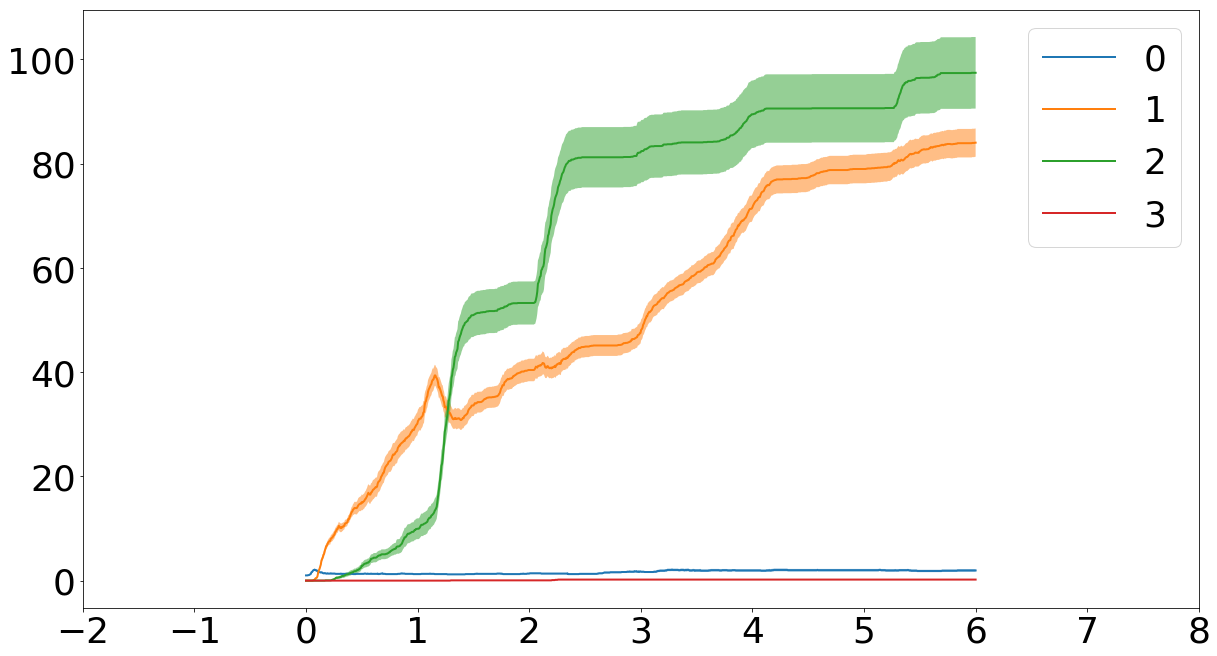

In [21]:
fig = plt.figure(figsize=(20, 11))
ax = plt.gca()
bettis = [0,1,2,3]
stim = 'L_40k'
dat = bc[stim]
dats = bcs[stim]
avg = np.mean(dat, axis=2)
avgs = np.mean(dats, axis=2)

std = np.std(dat, axis=2)
stds = np.std(dats, axis=2)

stderr = std / np.sqrt(np.shape(dat)[2])
stderrs = stds / np.sqrt(np.shape(dats)[2])

for ind, betti in enumerate(bettis):

    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    ax.plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    #ax.plot(t_ms/1000, ys, linewidth=2)
    #ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=36)
    ax.set_xticks(range(-2,9))
    ax.legend(['0', '1', '2', '3'], fontsize=36)
    #if betti == 3:
    #    ax.set_ylim([-0.1, 4])
ax.set_xlim([-2,8])
plt.savefig(os.path.join(figsavepth, '{}_P03S03_AllBettis_stim{}.pdf'.format(bird,stim)))

# Comparison between full population and subsets

In [14]:
reload(tp2)

bird = 'B1056'
block_path = bps[bird]
bdf = bdfs[bird]

analysis_id = 'test2'
thresh = 4.0
nperms = None
ncellsperm = 0
dim = [0,1, 2,3,4]
Ntimes = 1000

windt = 10.0
dtovr = windt*0.5
stimlen = 6000 #ms
twin = np.linspace(0, stimlen, Ntimes)

(bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
#shuffle
(bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dim, twin, windt, dtovr, shuffle=True)


nperms = 20
ncellsperm = 30
(bc_perm, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dim, twin, windt, dtovr, shuffle=False)
#shuffle
(bcs_perm, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dim, twin, windt, dtovr, shuffle=True)

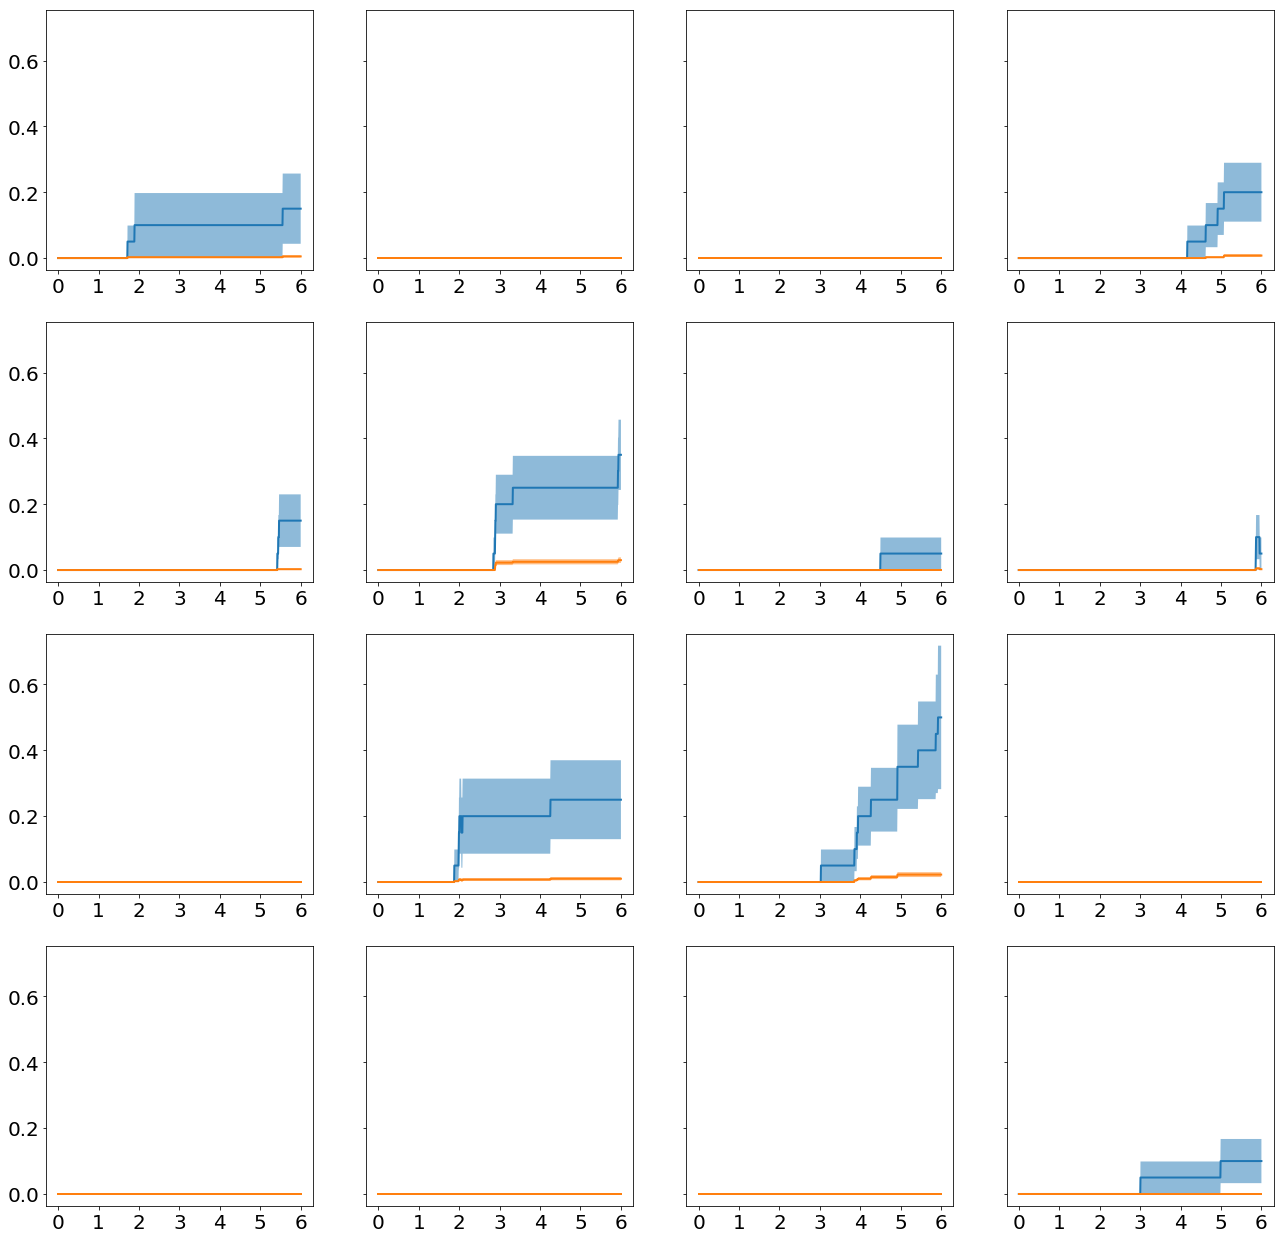

In [24]:

betti = 3
fig, axs = plt.subplots(4,4, figsize=(22,22), sharey=True)
axs = axs.flatten()
for ind, stim in enumerate(bc.keys()):
    dat = bc[stim]
    dats = bc_perm[stim]
    avg = np.mean(dat, axis=2)
    avgs = np.mean(dats, axis=2)
    
    std = np.std(dat, axis=2)
    stds = np.std(dats, axis=2)
    
    stderr = std / np.sqrt(np.shape(dat)[2])
    stderrs = stds / np.sqrt(np.shape(dats)[2])
    
    y = avg[betti, :]
    ys = avgs[betti, :]
    
    s = stderr[betti, :]
    ss = stderrs[betti, :]
    
    ax = axs[ind]
    ax.plot(t_ms/1000, y,linewidth=2)
    ax.fill_between(t_ms/1000, y-s, y+s, alpha=0.5)
    ax.plot(t_ms/1000, ys, linewidth=2)
    ax.fill_between(t_ms/1000, ys-ss, ys+ss, alpha=0.5)
    ax.tick_params(labelsize=20)
    ax.set_xticks(range(7))
    #if betti == 3:
     #   ax.set_ylim([-0.1, 4])
    
plt.savefig(os.path.join('/home/brad/DailyLog/20170829/', '{}_BettiCurveWithPermed{}-{}_betti{}.eps'.format(bird,ncellsperm, nperms,betti)))

# Comparison Across Birds

In [3]:
# 4 birds, 4 Bettis, all stim on one chart 
birds = ['B1083', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

#bin the data
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForBettiCurves2'
segment_info = [0,0]
bdfs = {}

for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf


/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174044Z-10.0-5.0.binned
/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174054Z-10.0-5.0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174108Z-10.0-5.0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForBettiCurves2/20180213T174118Z-10.0-5.0.binned


In [4]:
#compute bettis:
bcurves = {}     # dictionary to store betti curves for each bird

# Compute betti curves for each bird
for bird in birds:
    block_path = bps[bird]
    bdf = bdfs[bird]
    (bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dims, twin, windt, dtovr, shuffle=False)
    bcurves[bird] = bc

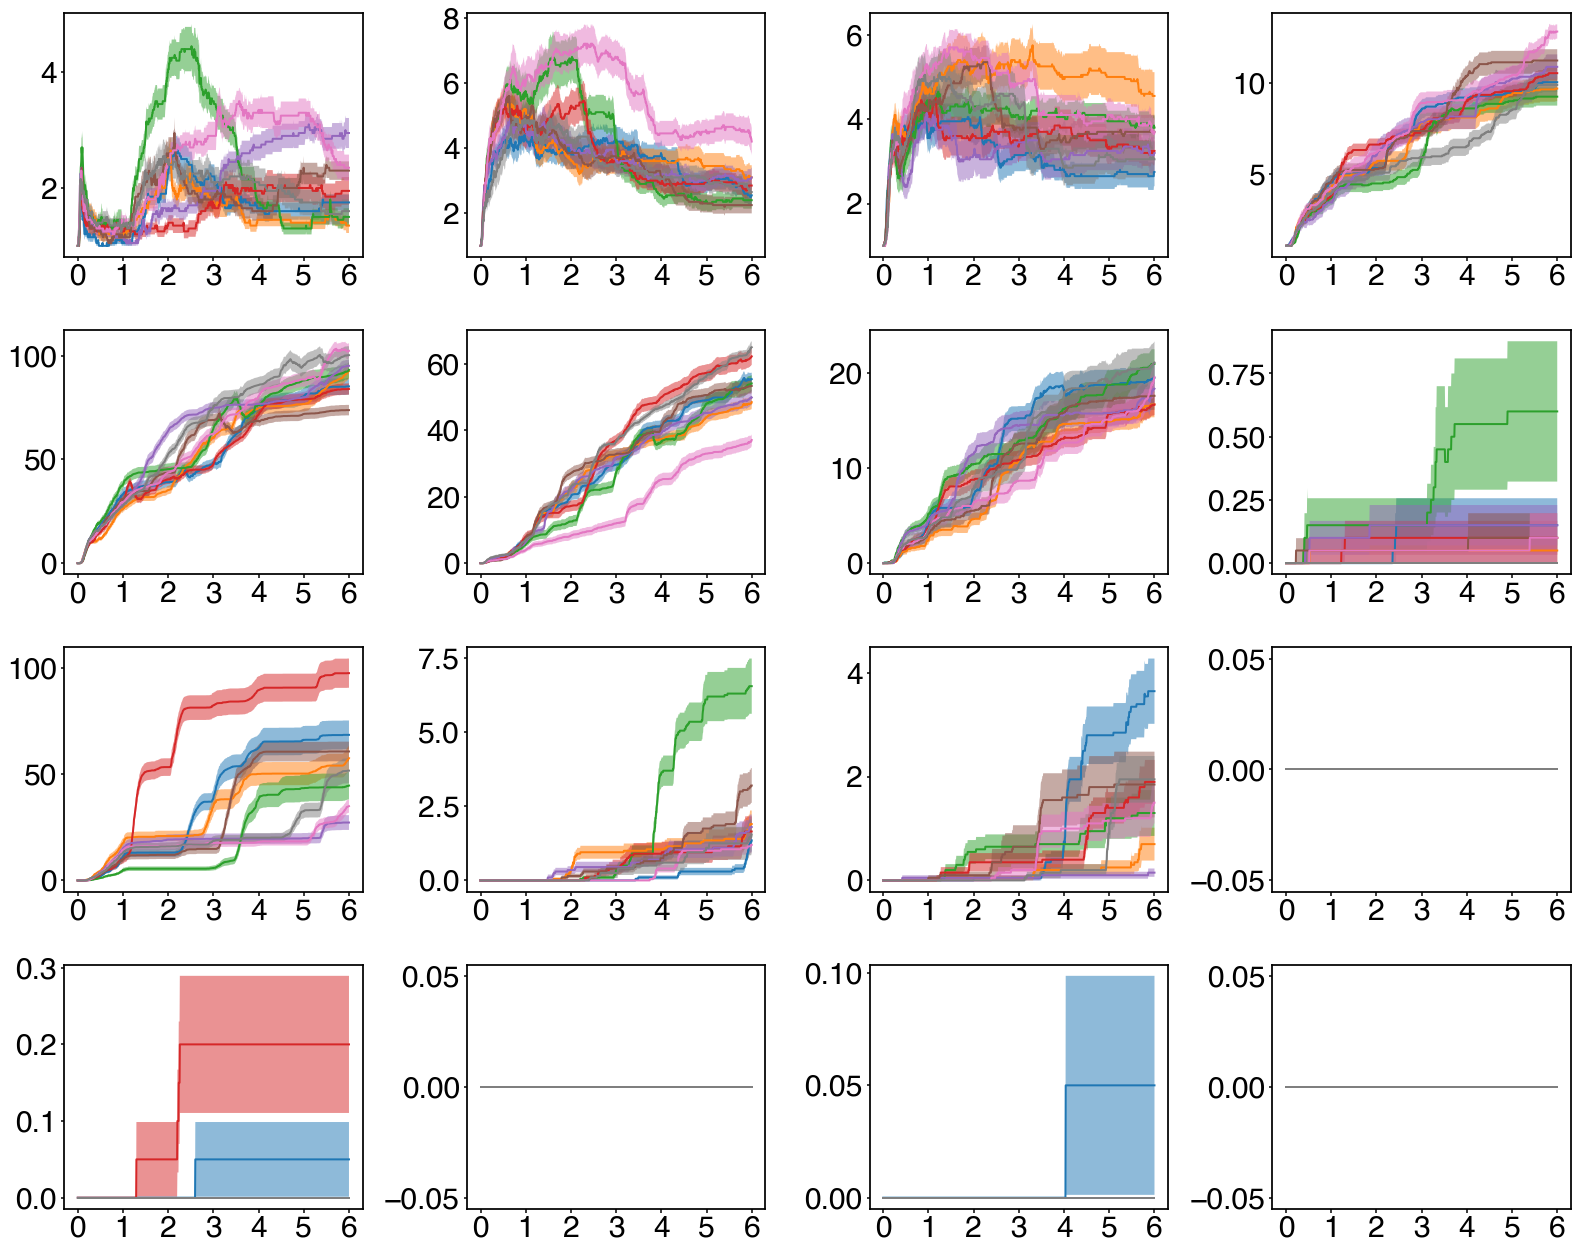

In [18]:
# generate figure and axes
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig, axs = plt.subplots(len(birds), len(dims), figsize=(27,22))
axs = axs.flatten()

for ind1, bird in enumerate(birds):
    bc = bcurves[bird]      # pull betti curves from bird
    for ind2, betti in enumerate(dims):
        
        # pull stimuli to plot
        stims = list(bc.keys())
        stims_to_plot = stims[-8:]
        
        # compute mean and stderr betti curves
        bc_bird = tp2.compute_mean_stderr_betti_curves(bc)
        
        # plot betti curve for each stimulus
        for ind, stim in enumerate(stims_to_plot):
            ax = axs[ind2*len(dims) + ind1]
            tpplt.plot_betti_curve(bc_bird, t_ms, stim, betti, ax)

plt.subplots_adjust(wspace=0.35, hspace=0.3)
# Save figure
plt.savefig(os.path.join(figsavepth, 'AllBirdsAllBettisAllStim{}.pdf'.format(windt)))

# Sound Spike Betti Plot

In [39]:
from ephys import core, events, rasters

bird = 'B1083'

bettis = [0,1,2,3]

block_path = bps[bird]
spikes     = core.load_spikes(block_path)
clusters   = core.load_clusters(block_path)
digmarks = events.load_events(block_path, 'DigMark')
fs         = core.load_fs(block_path)
trials     = events.load_trials(block_path)
rec        = 0 


bc = bcurves[bird]
bc_bird = tp2.compute_mean_stderr_betti_curves(bc)


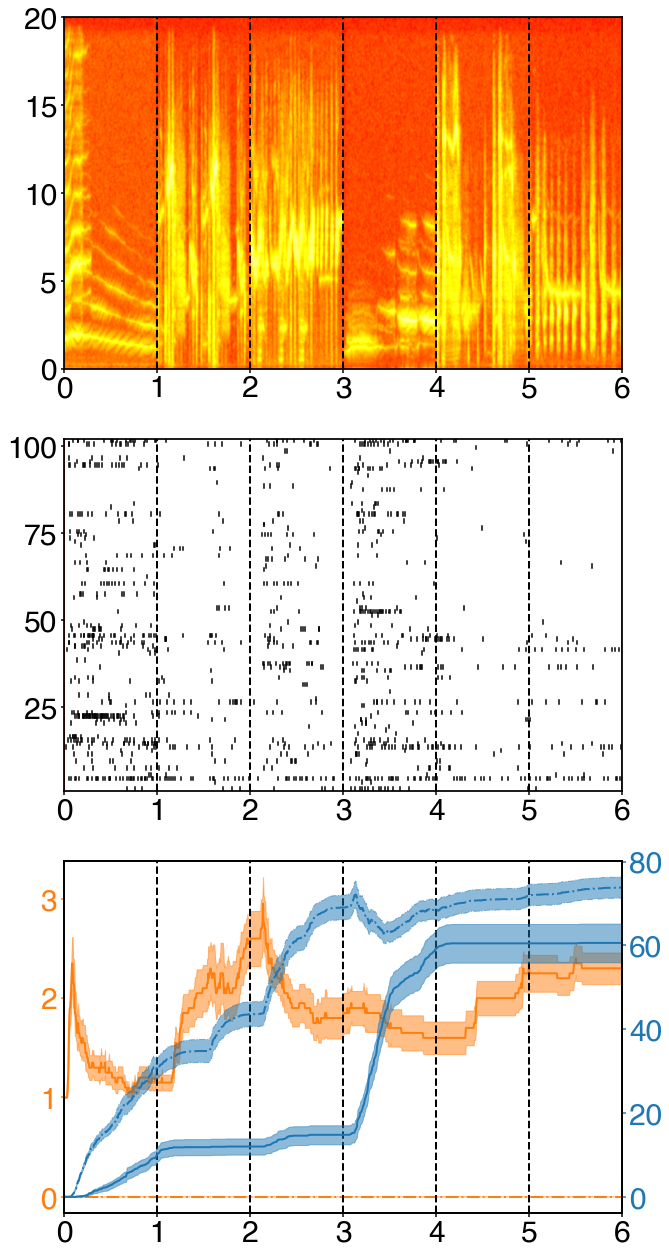

In [107]:
from importlib import reload
reload(tpplt)

stim = 'N_40k'
trial = 1

plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(10,22))
ax_sound = fig.add_subplot(311)
ax_spikes = fig.add_subplot(312, sharex=ax_sound)
ax_bettis = fig.add_subplot(313, sharex=ax_sound)

# Plot sound
from scipy.signal import spectrogram
from scipy.io.wavfile import read
(rate, x) =read('/home/brad/krista_stims/{}.wav'.format(stim))
x = x / x.max()
freqs, spts, Sxx = spectrogram(x, rate, nperseg=512, nfft=512, noverlap=512-64, return_onesided=True, mode='psd')
freqs /= 1000.0
Sxx /= np.amax(Sxx)
Sxx = np.log10(Sxx)
nf, nt = np.shape(Sxx)
thresh = -np.inf
Sxx[Sxx< thresh] = thresh
ax_sound.imshow(Sxx, origin='lower', aspect='auto', extent=(0, spts[-1],0, freqs[-1]), cmap='hot', interpolation='bicubic')
ax_sound.set_ylim([0, freqs[-1]])


# plot spikes
clusters_to_plot = clusters[clusters['quality']=='Good']
rasters.plot_raster_stim_trial(spikes, trials, clusters_to_plot, stim, trial, [0, 0], rec, fs, ax=ax_spikes)

# plot betti
orng = '#ff7f0e'
blu = '#1f77b4'
betticols = [orng, blu, blu, orng]
bstyle = ['-', '-.', '-', '-.']
for betti in [0, 3]:
    tpplt.plot_betti_curve(bc_bird, t_ms, stim, betti, ax_bettis, color=betticols[betti], linestyle=bstyle[betti])
ax_bettis.tick_params('y', colors=orng)
ax_bettis2 = ax_bettis.twinx()
ax_bettis2.tick_params('y', colors=blu)
for betti in [1, 2]:
    tpplt.plot_betti_curve(bc_bird, t_ms, stim, betti, ax_bettis2, color=betticols[betti], linestyle=bstyle[betti])
    
axs = [ax_sound, ax_spikes, ax_bettis]
for ax in axs:
    oldylim = ax.get_ylim()
    for sec in [1,2,3,4,5]:
        
        ax.plot([sec, sec], oldylim, 'k--', linewidth=2)
    ax.set_ylim(oldylim)

In [94]:
Sxx.min()

-15.72039676234574

In [75]:
ax_sound.get_ylim()


(126.6089184060721, 130.3910815939279)